In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [26]:
data= pd.read_csv(r"C:\Users\Dell\Downloads\census_income.csv")

In [27]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
data.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [29]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### The initial step involves loading the dataset and cchecking its contents('data', data.dtypes, 'data.isnull)
### * Categorical columns were encoded using 'LabelEncoder' to convert thwm into numerical values, making them suitable for model trainning.
### * The dataset was then split into training and testing sets

In [30]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [9]:
X = data.drop('Income', axis=1)
y = data['Income']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(26048, 14)

In [13]:
X_test.shape

(6512, 14)

In [14]:
y_train.shape

(26048,)

In [15]:
y_test.shape

(6512,)

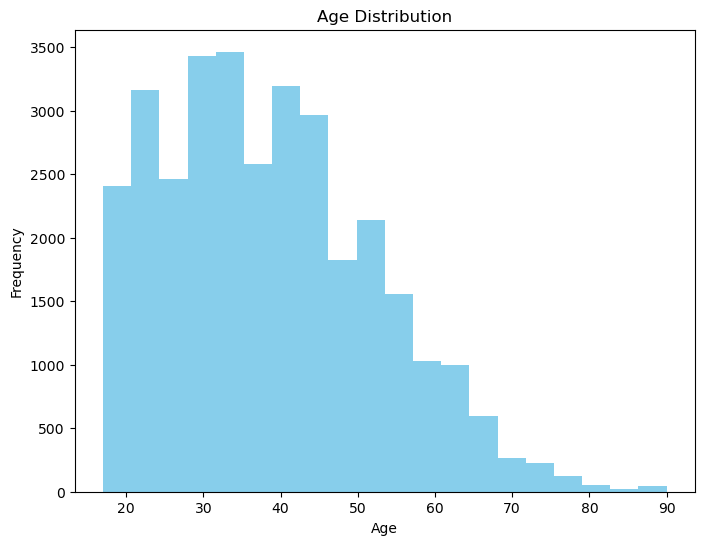

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


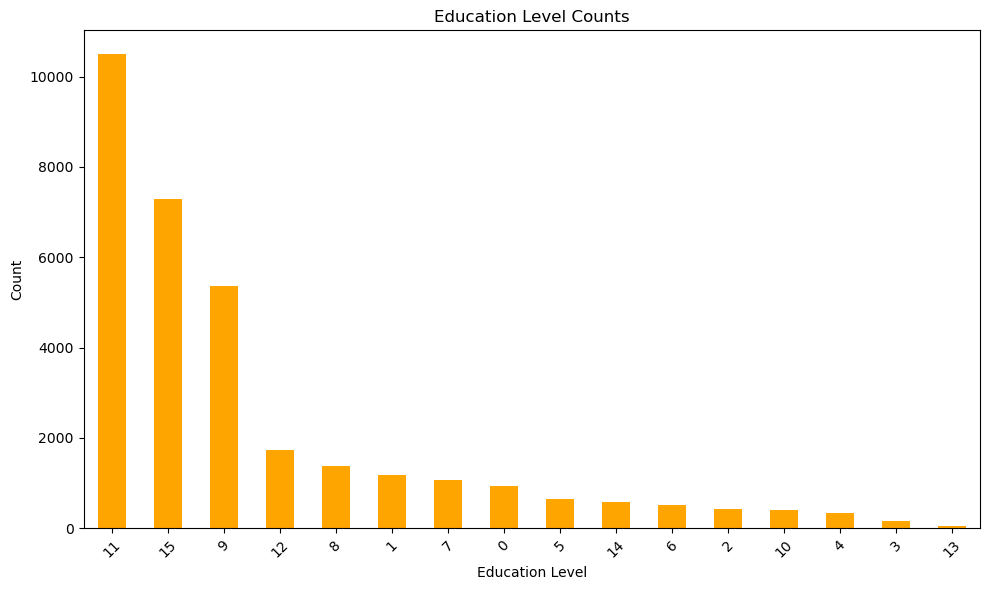

In [39]:
#Now let's create a bar plot showing the count of each education level
plt.figure(figsize=(10, 6))
education_counts = data['Education'].value_counts()
education_counts.plot(kind='bar', color='orange')
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## * Histograms were ploted to visualize the distribution of ' AGE'
## * A bar plt was created to display the count of each 'Education Level'

In [17]:
clf = DecisionTreeClassifier(random_state=42)

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8077395577395577
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4912
           1       0.61      0.63      0.62      1600

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.74      6512
weighted avg       0.81      0.81      0.81      6512



### *The accuracy achived by thr model on the test set is around 80.8%
### * The classification report provides a breakdown of precission, recall and F1 score for both income classes
### * Precision measure the accuracy of the positive prediction made by thr model
### * Recall measures the proportion of actual positive that were correctly indentified by the model.

### overall the model performances seems reasonably good but there might be the room for improvement especially for the >50k income class where precisio recall recall and F1 score are comparatively lower than the <=50k class. further model tuning or consider different algorithms might enhance the prediction performance for the >50k income category.